In [1]:
!pip install pycoingecko

In [24]:
from pycoingecko import CoinGeckoAPI
from datetime import timedelta
import time
import datetime as dt
import pandas as pd

In [25]:
cg = CoinGeckoAPI()

data = cg.get_coins_markets('usd')[:34]
ids = list()

for i in data:
  ids.append(i['id'])

print(ids) 

['bitcoin', 'ethereum', 'tether', 'usd-coin', 'binancecoin', 'ripple', 'binance-usd', 'cardano', 'solana', 'dogecoin', 'polkadot', 'wrapped-bitcoin', 'tron', 'staked-ether', 'avalanche-2', 'dai', 'shiba-inu', 'leo-token', 'litecoin', 'crypto-com-chain', 'matic-network', 'ftx-token', 'near', 'bitcoin-cash', 'monero', 'okb', 'stellar', 'chainlink', 'ethereum-classic', 'cosmos', 'algorand', 'flow', 'uniswap', 'vechain']


In [26]:
def remove(target_list, remove_list):
  l = target_list

  for i in remove_list:
    idx = l.index(i)
    l.pop(idx)
  
  return l

In [27]:
ids = remove(ids, ['tether', 'usd-coin', 'binance-usd', 'wrapped-bitcoin', 'staked-ether', 'dai'])
print(ids)

['bitcoin', 'ethereum', 'binancecoin', 'ripple', 'cardano', 'solana', 'dogecoin', 'polkadot', 'tron', 'avalanche-2', 'shiba-inu', 'leo-token', 'litecoin', 'crypto-com-chain', 'matic-network', 'ftx-token', 'near', 'bitcoin-cash', 'monero', 'okb', 'stellar', 'chainlink', 'ethereum-classic', 'cosmos', 'algorand', 'flow', 'uniswap', 'vechain']


In [28]:
end = dt.datetime(2022,5,26)
start = end - timedelta(days=85)

start_timestamp = time.mktime(start.timetuple())
end_timestamp = time.mktime(end.timetuple())

In [29]:
def create_csv(start_date, end_date, list_price, symbol):
  list_date = pd.date_range(start_date, end_date, freq='60min')[:2001]

  if len(list_date) != len(list_price):
    raise Exception(f'Check data length for symbol: {symbol}')
  df = pd.DataFrame({'date': list_date, 'close': list_price})
  df = df.set_index('date')
  df.to_csv(f'C:/Users/saxen/Downloads/Price/{symbol}.csv')

In [30]:
len(list_price)

2001

In [31]:
len(pd.date_range(start, end, freq='60min')[:-3])

2038

In [32]:
for n in range(len(ids)):
  id = ids[n]

  if n%3 == 0:
    time.sleep(60)

  download = cg.get_coin_market_chart_range_by_id(id, vs_currency='usd', from_timestamp = start_timestamp,
                                                    to_timestamp = end_timestamp)['prices'][:2001]
  list_price = []

  for l in download:
    list_price.append(l[1])

  create_csv(start_date=start, end_date=end, list_price=list_price, symbol=id)


In [33]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import os
from functools import reduce
from statsmodels.tsa.stattools import coint

In [34]:
file_names.remove('.ipynb_checkpoints')

In [36]:
sns.set(style='white')

# Retrieve intraday price data and combine them into a DataFrame.
# 1. Load downloaded prices from folder into a list of dataframes.
folder_path = r'C:/Users/saxen/Downloads/Price'
file_names = os.listdir(folder_path)
tickers = [name.split('.')[0] for name in file_names]
df_list = [pd.read_csv(os.path.join(folder_path, name)) for name in file_names]

In [37]:
for i in range(len(df_list)):
    df_list[i].rename(columns={'close': tickers[i]}, inplace=True)

In [38]:
df_list

[                     date  algorand
 0     2022-03-02 00:00:00  0.830590
 1     2022-03-02 01:00:00  0.828120
 2     2022-03-02 02:00:00  0.831662
 3     2022-03-02 03:00:00  0.838958
 4     2022-03-02 04:00:00  0.837537
 ...                   ...       ...
 1996  2022-05-24 04:00:00  0.411129
 1997  2022-05-24 05:00:00  0.397676
 1998  2022-05-24 06:00:00  0.394392
 1999  2022-05-24 07:00:00  0.405570
 2000  2022-05-24 08:00:00  0.402870
 
 [2001 rows x 2 columns],
                      date  avalanche-2
 0     2022-03-02 00:00:00    85.865702
 1     2022-03-02 01:00:00    85.544897
 2     2022-03-02 02:00:00    85.752440
 3     2022-03-02 03:00:00    86.236436
 4     2022-03-02 04:00:00    85.860699
 ...                   ...          ...
 1996  2022-05-24 04:00:00    28.517002
 1997  2022-05-24 05:00:00    27.464100
 1998  2022-05-24 06:00:00    27.461780
 1999  2022-05-24 07:00:00    28.720615
 2000  2022-05-24 08:00:00    28.402399
 
 [2001 rows x 2 columns],
                    

In [39]:
df  = reduce(lambda x, y: pd.merge(x, y, on='date'), df_list)
idx = round(len(df) * 0.7)
df  = df.iloc[:idx, :]

Text(0.5, 0.98, 'Pearson Correlations')

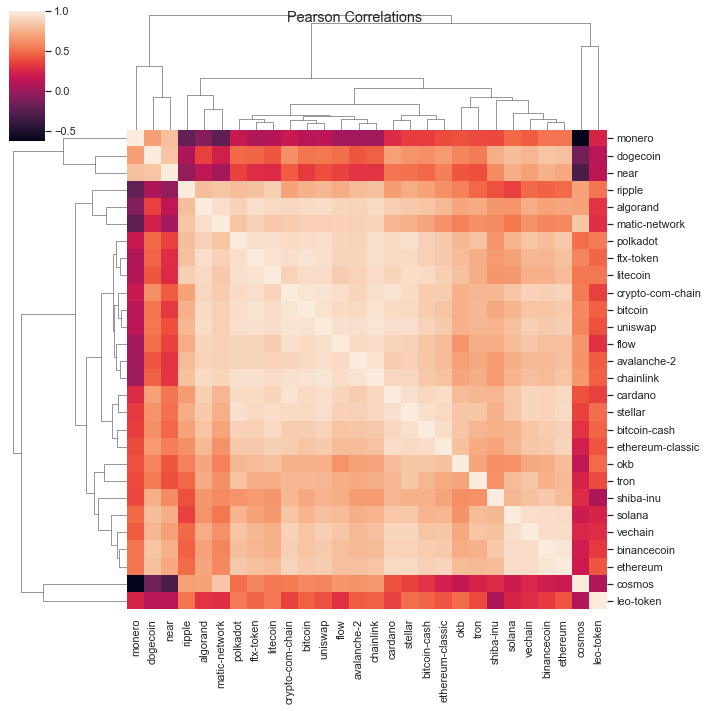

In [40]:
pearson_corr  = df[tickers].corr()
sns.clustermap(pearson_corr).fig.suptitle('Pearson Correlations')

In [42]:
sorted_mat = pearson_corr.unstack().sort_values(ascending=False)

print(sorted_mat[20:50])

ripple            ripple              1.000000
shiba-inu         shiba-inu           1.000000
solana            solana              1.000000
stellar           stellar             1.000000
tron              tron                1.000000
uniswap           uniswap             1.000000
binancecoin       binancecoin         1.000000
vechain           vechain             1.000000
uniswap           chainlink           0.973920
chainlink         uniswap             0.973920
ethereum          binancecoin         0.972536
binancecoin       ethereum            0.972536
bitcoin           crypto-com-chain    0.972479
crypto-com-chain  bitcoin             0.972479
                  uniswap             0.965915
uniswap           crypto-com-chain    0.965915
bitcoin           ftx-token           0.965792
ftx-token         bitcoin             0.965792
crypto-com-chain  cardano             0.963482
cardano           crypto-com-chain    0.963482
litecoin          ftx-token           0.961645
ftx-token    

In [43]:
pair1 = ['bitcoin', 'ftx-token']
pair2 = ['binancecoin', 'ethereum']
pair3 = ['uniswap', 'crypto-com-chain']

C:\Users\saxen\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\saxen\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\saxen\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


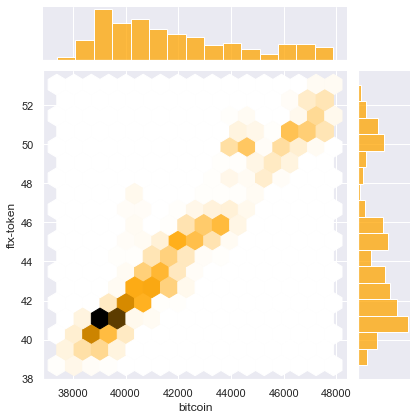

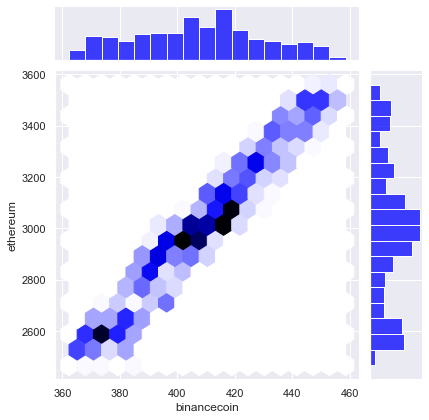

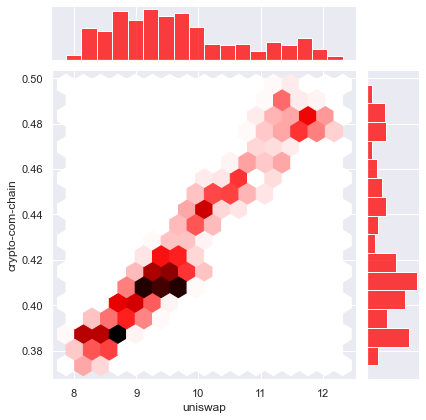

In [44]:
sns.set(style='darkgrid')
sns.jointplot(df[pair1[0]], df[pair1[1]],  kind='hex', color='orange')
sns.jointplot(df[pair2[0]],  df[pair2[1]], kind='hex', color='blue')
sns.jointplot(df[pair3[0]],  df[pair3[1]], kind='hex', color='red')

In [45]:
x = df[pair1[0]]
y = df[pair1[1]]
_, p_value, _ = coint(x, y)
print(f'The p_value of {pair1[0]}-{pair1[1]} pair cointegration is: {p_value}')

The p_value of bitcoin-ftx-token pair cointegration is: 0.0009301723878237155


In [46]:
x = df[pair2[0]]
y = df[pair2[1]]
_, p_value, _ = coint(x, y)
print(f'The p_value of {pair2[0]}-{pair2[1]} pair cointegration is: {p_value}')

The p_value of binancecoin-ethereum pair cointegration is: 0.005993167787295645


In [47]:
x = df[pair3[0]]
y = df[pair3[1]]
_, p_value, _ = coint(x, y)
print(f'The p_value of {pair3[0]}-{pair3[1]} pair cointegration is: {p_value}')

The p_value of uniswap-crypto-com-chain pair cointegration is: 0.006022051674475213


Text(0.5, 1.0, 'bitcoin-ftx-token Price Relationship')

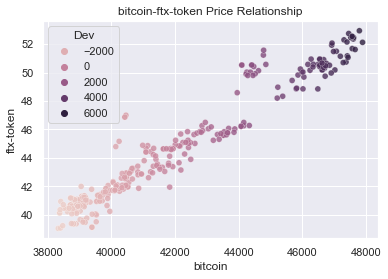

In [48]:
df2 = df[[pair1[0], pair1[1]]].copy()
spread = df2[pair1[0]] - df2[pair1[1]]
mean_spread = spread.mean()
df2['Dev'] = spread - mean_spread
rnd = np.random.choice(len(df), size=300)
sns.scatterplot(x=pair1[0], y=pair1[1], hue='Dev', linewidth=0.3, alpha=0.8,
                data=df2.iloc[rnd, :]).set_title(f'{pair1[0]}-{pair1[1]} Price Relationship')

Text(0.5, 1.0, 'binancecoin-ethereum Price Relationship')

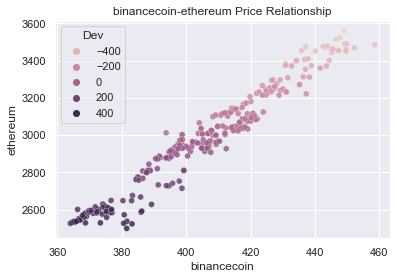

In [49]:
df2 = df[[pair2[0], pair2[1]]].copy()
spread = df2[pair2[0]] - df2[pair2[1]]
mean_spread = spread.mean()
df2['Dev'] = spread - mean_spread
rnd = np.random.choice(len(df), size=300)
sns.scatterplot(x=pair2[0], y=pair2[1], hue='Dev', linewidth=0.3, alpha=0.8,
                data=df2.iloc[rnd, :]).set_title(f'{pair2[0]}-{pair2[1]} Price Relationship')

Text(0.5, 1.0, 'uniswap-crypto-com-chain Price Relationship')

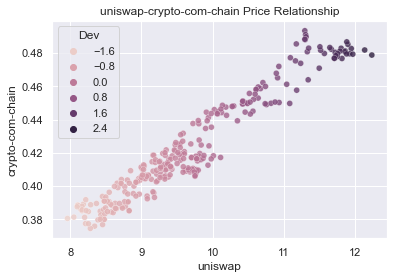

In [50]:
df2 = df[[pair3[0], pair3[1]]].copy()
spread = df2[pair3[0]] - df2[pair3[1]]
mean_spread = spread.mean()
df2['Dev'] = spread - mean_spread
rnd = np.random.choice(len(df), size=300)
sns.scatterplot(x=pair3[0], y=pair3[1], hue='Dev', linewidth=0.3, alpha=0.8,
                data=df2.iloc[rnd, :]).set_title(f'{pair3[0]}-{pair3[1]} Price Relationship')

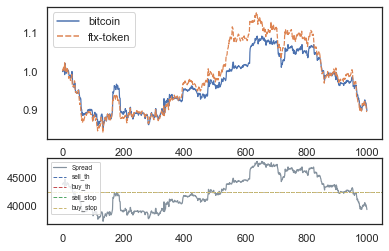

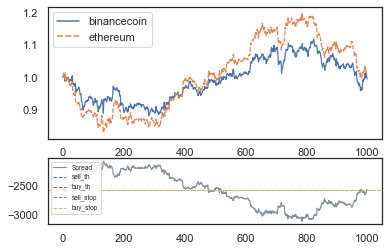

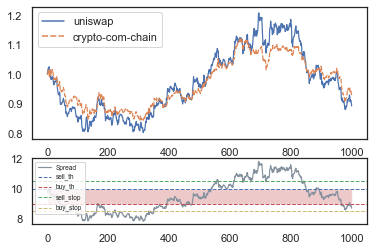

In [51]:
def plot_spread(df, ticker1, ticker2, idx, th, stop):

    px1 = df[ticker1].iloc[idx] / df[ticker1].iloc[idx[0]]
    px2 = df[ticker2].iloc[idx] / df[ticker2].iloc[idx[0]]

    sns.set(style='white')

    # Set plotting figure
    fig, ax = plt.subplots(2, 1, gridspec_kw={'height_ratios': [2, 1]})

    # Plot the 1st subplot
    sns.lineplot(data=[px1, px2], linewidth=1.2, ax=ax[0])
    ax[0].legend(loc='upper left')

    # Calculate the spread and other thresholds
    spread = df[ticker1].iloc[idx] - df[ticker2].iloc[idx]
    mean_spread = spread.mean()
    sell_th     = mean_spread + th
    buy_th      = mean_spread - th
    sell_stop   = mean_spread + stop
    buy_stop    = mean_spread - stop

    # Plot the 2nd subplot
    sns.lineplot(data=spread, color='#85929E', ax=ax[1], linewidth=1.2)
    ax[1].axhline(sell_th,   color='b', ls='--', linewidth=1, label='sell_th')
    ax[1].axhline(buy_th,    color='r', ls='--', linewidth=1, label='buy_th')
    ax[1].axhline(sell_stop, color='g', ls='--', linewidth=1, label='sell_stop')
    ax[1].axhline(buy_stop,  color='y', ls='--', linewidth=1, label='buy_stop')
    ax[1].fill_between(idx, sell_th, buy_th, facecolors='r', alpha=0.3)
    ax[1].legend(loc='upper left', labels=['Spread', 'sell_th', 'buy_th', 'sell_stop', 'buy_stop'], prop={'size':6.5})

idx = range(1000)
plot_spread(df, pair1[0], pair1[1], idx, 0.5, 1)

idx = range(1000)
plot_spread(df, pair2[0], pair2[1], idx, 0.5, 1)

idx = range(1000)
plot_spread(df, pair3[0], pair3[1], idx, 0.5, 1)

# Backtesting

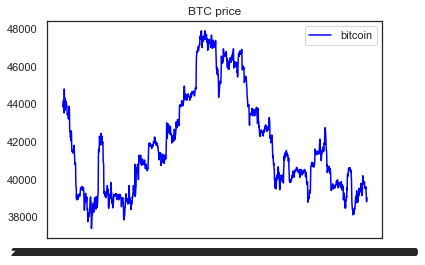

In [69]:
data = df[['date','bitcoin','ftx-token']]

data = data.set_index('date')


ts1 = data['bitcoin']
ts2 = data['ftx-token']

ticker1 = 'bitcoin'
ticker2 = 'ftx-token'


# Plot the time series
plt.plot(ts1.index, ts1, label=ticker1, color='blue')
plt.title('BTC price')
_ = plt.legend()

Text(0.5, 1.0, 'FTX-token price')

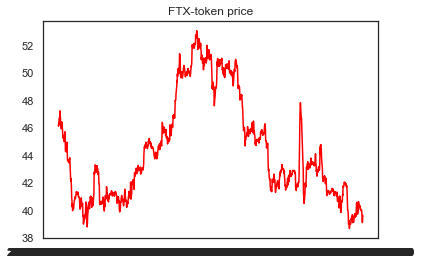

In [70]:
plt.plot(ts2.index, ts2, label=ticker2, color='red')
plt.title('FTX-token price')

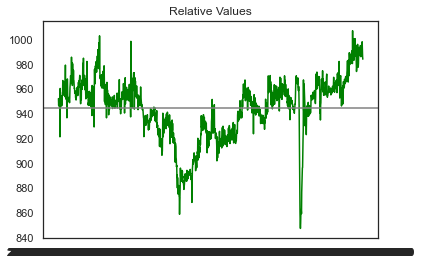

In [74]:
# Visualize cointegration
relative_values = ts1/ts2

# Observe values oscilating near the average value
plt.plot(relative_values.index, relative_values, color='green')
plt.title('Relative Values')
_ = plt.axhline(np.mean(relative_values), color='grey')

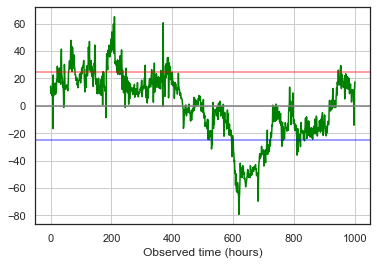

In [93]:
# Visualize cointegration
relative_values = relative_values[-1500:-500]
mean = np.mean(relative_values)
xplot = np.linspace(0, 1000, len(relative_values))

# Observe values oscilating near the average value
plt.plot(xplot, relative_values-mean, color='green')
plt.axhline(0, color='grey')
plt.axhline(bound, color='red', alpha=0.5)
plt.axhline(-bound,color='blue', alpha=0.5)
plt.xlabel('Observed time (hours)')
plt.grid()

In [94]:
base = np.mean(relative_values-mean)

In [95]:
bound = np.std(relative_values-mean)

In [96]:
# Initialize the variables

# Portfolio value over time
# It equals the total plus the position value
portfolio_value = []

# Current total
total = 0

position_encoding = {
0 : 'no positions',
1 : 'long on BTC & short on FTX',
2 : 'long on FTX & short on BTC'}
current_position = 0  # Starts with no positions
position_history = []

# Number of shares
n_btc = 0 
n_ftx = 0

# Stock prices
ts1 = ts1[-1500:]
ts2 = ts2[-1500:]

# Relative values
relative_values = ts1/ts2

# Historical mean
mean = np.mean(relative_values[:-500])  # Spare 500 points for oot test

In [97]:
# This function returns the numbers of units to trade from each company
# In this case I will fix the number of BTC's units to 1000 and round up
#   the equivalent number of FTX's units to the closest int. 
def get_number_of_units(time):
  ratio_btc_ftx = ts2[time]/ts1[time]
  return np.rint(1000*ratio_btc_ftx), 1000

In [98]:
# Strategy simulation script
for i, rv in enumerate((relative_values-mean)):
  # If has position check if should quit
  if current_position == 1:
    # condition to quit long BTC short ftx
    if rv <= base:
      total += ts1[i] * n_btc
      total -= ts2[i] * n_ftx
      n_btc = 0
      n_ftx = 0
      current_position = 0
  elif current_position == 2:
    # condition to quit long btc short ftx
    if rv >= base:
      total -= ts1[i] * n_btc
      total += ts2[i] * n_ftx
      n_btc = 0
      n_ftx = 0
      current_position = 0
 # If has no position check if should enter
  # Note that this allows to switch positions
  if current_position == 0:
    # condition to enter long btc short ftx
    if rv >= bound:
      n_btc, n_ftx = get_number_of_units(i)
      total += ts1[i] * n_btc
      total -= ts2[i] * n_ftx
      current_position = 2
    # condition to enter long BTC short Ftx
    elif rv <= -1*bound:
      n_btc, n_ftx = get_number_of_units(i)
      total -= ts1[i] * n_btc
      total += ts2[i] * n_ftx
      current_position = 1

  # Register position
  position_history.append(current_position)

  # Compute current portfolio value 
  current_portfolio_value = total
  # If long btc short ftx
  if current_position == 1:
    current_portfolio_value += n_btc * ts1[i]
    current_portfolio_value -= n_ftx * ts2[i]
  # If long btc short ftx
  elif current_position == 2:
    current_portfolio_value -= n_btc * ts1[i]
    current_portfolio_value += n_ftx * ts2[i]
  # Register current portfolio value
  portfolio_value.append(current_portfolio_value)
    
print('Final portfolio value: %.2F' % portfolio_value[-1])

Final portfolio value: 35428.66


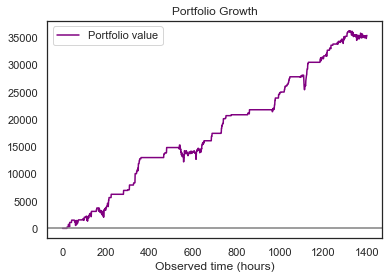

In [100]:
# Plot results
xplot = np.linspace(0, 1401, 1401)
plt.plot(xplot, portfolio_value, color='purple', label='Portfolio value')
plt.axhline(0, color='grey')
plt.xlabel('Observed time (hours)')
plt.title('Portfolio Growth')
_ = plt.legend()

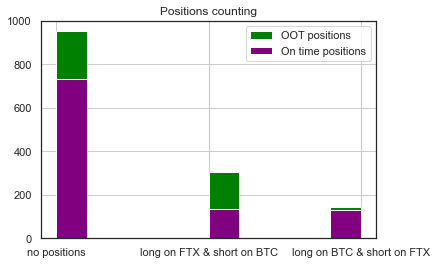

In [101]:
# Display the total of each position
enconded_positions = [position_encoding[i] for i in position_history]
plt.hist(enconded_positions, color='green', label='OOT positions')
plt.hist(enconded_positions[:1000], color='purple', label='On time positions')
plt.title('Positions counting')
plt.grid()
_ = plt.legend()

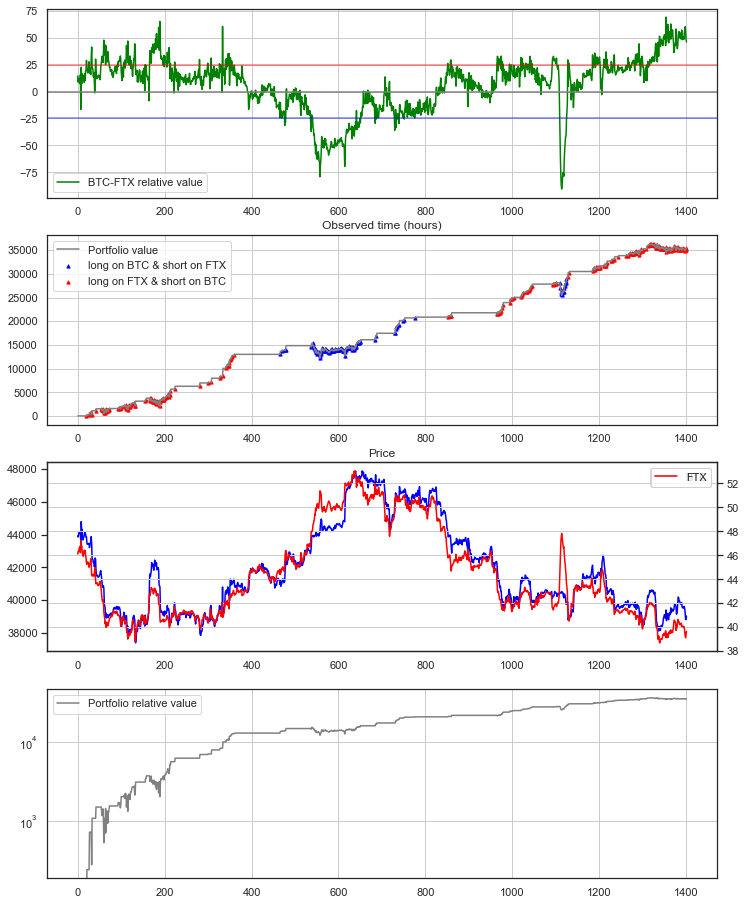

In [104]:
# Compare relative value between BTC and FTX with the positions
plt.figure(figsize=(12,16))

plt.subplot(411)
# Plot relative positions
mean = np.mean(relative_values[:-500])
xplot = np.linspace(0, 1401, len(relative_values))
plt.plot(xplot, relative_values-mean, color='green', label='BTC-FTX relative value')
# Plot the edges
plt.axhline(base, color='grey')
plt.axhline(bound, color='red', alpha=0.5)
plt.axhline(-bound,color='blue', alpha=0.5)
plt.xlabel('Observed time (hours)')
plt.grid()
plt.legend()

plt.subplot(412)
color = ['grey', 'blue', 'red']
for key in position_encoding:
  if position_encoding[key] == 'no positions':
    continue
  x=[]
  y=[]
  for i, v in enumerate(position_history):
    if v == key:
      x.append(xplot[i])
      y.append(portfolio_value[i])

  plt.scatter(x, y, color=color[key], label=position_encoding[key], s=10, marker='^')
plt.plot(xplot, portfolio_value, color='grey', label='Portfolio value')
plt.grid()
plt.legend()

plt.subplot(413)
plt.plot(xplot, ts1[-1500:], label='BTC', color='blue')
plt.legend()
ax2 = plt.twinx()
ax2.plot(xplot, ts2[-1500:], label='FTX', color='red')
plt.title('Price')
plt.grid()
plt.legend()
plt.subplot(414)
plt.plot(xplot, portfolio_value, color='grey', label='Portfolio relative value')
plt.yscale('log')
plt.grid()
_ = plt.legend()

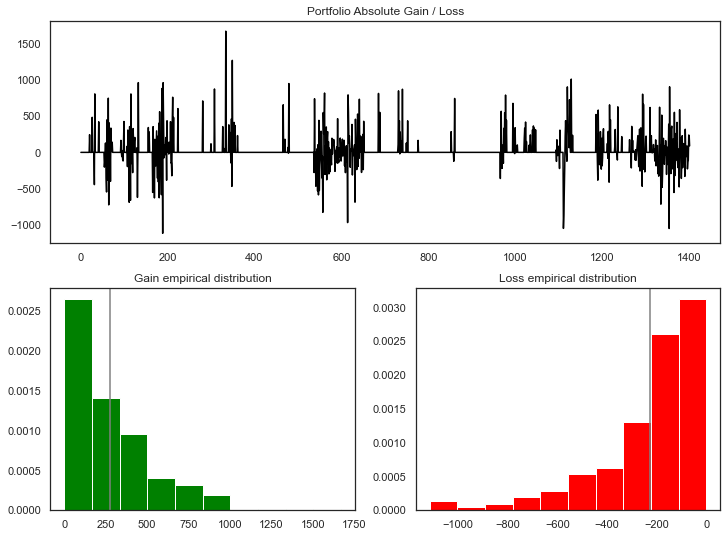

In [107]:
# Plot absolute gain/loss
gain_loss = np.diff(portfolio_value)
xplot = np.linspace(1,1401,1400)

plt.figure(figsize=(12,9))

plt.subplot(211)
plt.plot(xplot, gain_loss, color='black')
plt.title('Portfolio Absolute Gain / Loss')

plt.subplot(223)
gain = gain_loss[gain_loss>0]
plt.hist(gain, density=True, color='green')
plt.axvline(np.mean(gain), color='grey')
plt.title('Gain empirical distribution')

plt.subplot(224)
loss = gain_loss[gain_loss<0]
plt.hist(loss, density=True, color='red')
plt.axvline(np.mean(loss), color='grey')
_ = plt.title('Loss empirical distribution')

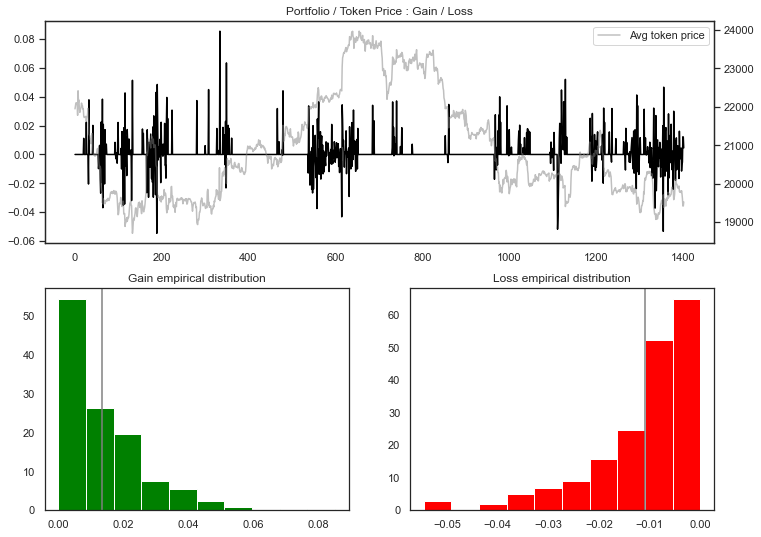

In [111]:
# Plot price-relative gain/loss
gain_loss = np.diff(portfolio_value)
xplot = np.linspace(1,1401,1400)
avg_price = (ts1+ts2)/2

gain_loss /= avg_price[-1400:]

plt.figure(figsize=(12,9))

plt.subplot(211)
plt.plot(xplot, gain_loss, color='black', label='Relative gain / loss')
plt.title('Portfolio / Token Price : Gain / Loss')
ax2 = plt.twinx()
ax2.plot(xplot, avg_price[-1400:], label='Avg token price', color='grey', alpha=0.5)
plt.legend()

plt.subplot(223)
gain = gain_loss[gain_loss>0]
plt.hist(gain, density=True, color='green')
plt.axvline(np.mean(gain), color='grey')
plt.title('Gain empirical distribution')

plt.subplot(224)
loss = gain_loss[gain_loss<0]
plt.hist(loss, density=True, color='red')
plt.axvline(np.mean(loss), color='grey')
_ = plt.title('Loss empirical distribution')

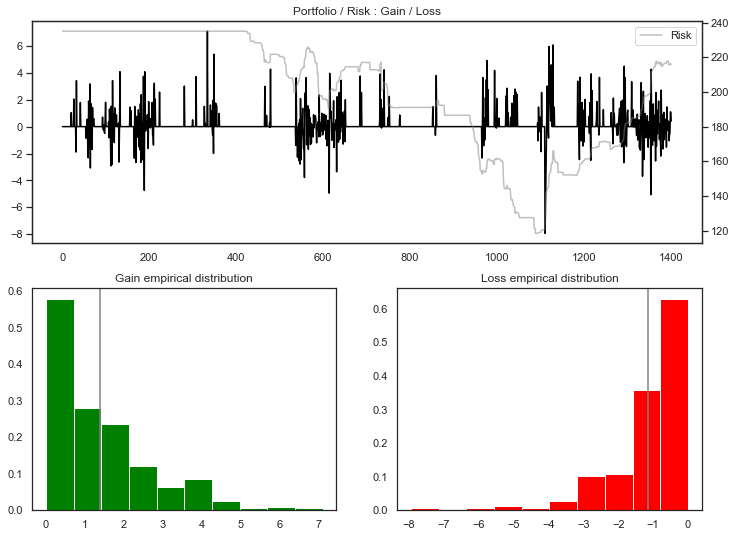

In [112]:
# Plot price-relative gain/loss
gain_loss = np.diff(portfolio_value)
xplot = np.linspace(1,1401,1400)

ts = pd.Series(gain_loss)
risk = ts.rolling(window=400).std()
for i in range(400):
  risk[i] = risk[400]

gain_loss /= risk

plt.figure(figsize=(12,9))

plt.subplot(211)
plt.plot(xplot, gain_loss, color='black', label='Relative gain / loss')
plt.title('Portfolio / Risk : Gain / Loss')
ax2 = plt.twinx()
ax2.plot(xplot, risk, label='Risk', color='grey', alpha=0.5)
plt.legend()

plt.subplot(223)
gain = gain_loss[gain_loss>0]
plt.hist(gain, density=True, color='green')
plt.axvline(np.mean(gain), color='grey')
plt.title('Gain empirical distribution')

plt.subplot(224)
loss = gain_loss[gain_loss<0]
plt.hist(loss, density=True, color='red')
plt.axvline(np.mean(loss), color='grey')
_ = plt.title('Loss empirical distribution')

In [113]:
print('_________Portfolio report_________\n\n')

print('Final value:           $ %.2F \n' % portfolio_value[-1])

print('Max value:             $ %.2F' % np.max(portfolio_value))
print('Min value:             $ %.2F\n' % np.min(portfolio_value))

print('Expected gain:         $ %.2F' % np.mean(np.diff(portfolio_value)))
print('Max gain:              $ %.2F' % np.max(np.diff(portfolio_value)))
print('Max loss:              $ %.2F\n' % np.min(np.diff(portfolio_value)))

print('Max cumulated loss:    $ %.2F' % np.min([np.min(portfolio_value[i:]) - np.max(portfolio_value[:i]) for i in range(1, len(portfolio_value)-1)]))
print('Volatility (std):      $ %.2F\n' % np.std(np.diff(portfolio_value)))

_________Portfolio report_________


Final value:           $ 35428.66 

Max value:             $ 36295.01
Min value:             $ 0.00

Expected gain:         $ 25.31
Max gain:              $ 1669.74
Max loss:              $ -1115.46

Max cumulated loss:    $ -3095.51
Volatility (std):      $ 203.81

